# Randomized Optimization Playground

In [105]:
import numpy as np
import pandas as pd
from functools import reduce
import time
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

problem  = 'FlipFlop'

# Randomized Hill Climbing

In [33]:
dataFile = 'outputs/FlipFlop_RHC/rhc__FlipFlop_RHC__run_stats_df.csv'

df = pd.read_csv(dataFile)
restarts = df['Restarts'].unique()
print(restarts)

[ 10  25  50 100]


In [70]:
fitness_data = []
timing_data  = []
for r in restarts:
    tmp = df.loc[(df['Restarts'] == r)].copy()
    fit = tmp[['Iteration', 'Fitness']].copy()
    fit.rename(columns={'Fitness': 'Restarts ' + str(r)}, inplace=True)
    fitness_data.append(fit)
    
    time = tmp[['Time']].mean()
    timing_data.append(time[0])

fitness = reduce(lambda left, right: pd.merge(left, right, on=['Iteration'], how='outer'), fitness_data)

fitness.head()
#print(timing_data)

,Iteration,Restarts 10,Restarts 25,Restarts 50,Restarts 100
0,0,9.0,9.0,9.0,9.0
1,0,9.0,9.0,9.0,9.0
2,0,9.0,9.0,9.0,10.0
3,0,9.0,9.0,9.0,8.0
4,0,9.0,9.0,9.0,10.0


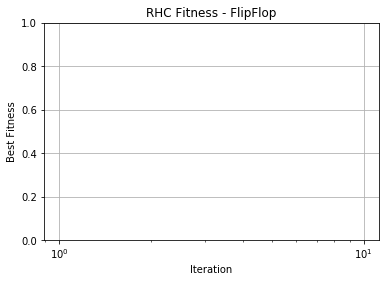

In [64]:
# Fitness plot
fig, ax = plt.subplots()
ax = fitness.plot(x='Iteration')
ax.set_xlabel("Iteration")
ax.set_ylabel("Best Fitness")
ax.set_xscale('log')
title = "RHC Fitness - " + problem
plt.title(title)
plt.grid()

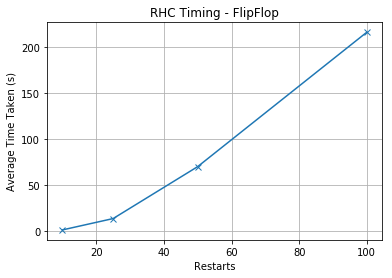

In [68]:
# Timing plotfig, ax = plt.subplots()
fig, ax = plt.subplots()
ax.set_xlabel("Restarts")
ax.set_ylabel("Average Time Taken (s)")
title = "RHC Timing - " + problem
plt.title(title)
plt.grid()
plt.plot(restarts, timing_data, 'x-')

# Simulated Annealing

In [215]:
dataFile = 'outputs/FlipFlop_SA/sa__FlipFlop_SA__run_stats_df.csv'

df = pd.read_csv(dataFile)
temperatures = df['Temperature'].unique()
print(temperatures)

[   2    4    8   16   32   64  128  256  512 1024 2048 4096 8192]


In [223]:
fitness_data = []
timing_data  = []
best_fitness = []
for t in temperatures:
    tmp = df.loc[(df['Temperature'] == t)].copy()
    fit = tmp[['Iteration', 'Fitness']].copy()
    best_fitness.append(fit['Fitness'].max())
    fit.rename(columns={'Fitness': 'Temperature ' + str(t)}, inplace=True)
    fitness_data.append(fit)
    
    time = tmp[['Time']].mean()
    timing_data.append(time[0])

fitness = reduce(lambda left, right: pd.merge(left, right, on=['Iteration'], how='outer'), fitness_data)

fitness.head()
print(best_fitness)

[19.0, 19.0, 19.0, 18.0, 19.0, 19.0, 18.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0]


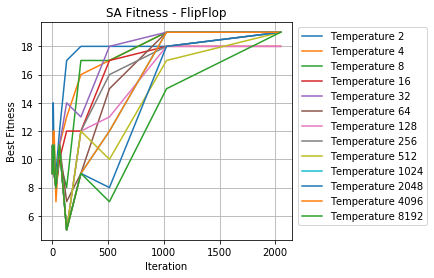

In [41]:
# Fitness plot
ax = fitness.plot(x='Iteration')
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width*0.75, pos.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.28, 1.0), ncol=1)
ax.set_xlabel("Iteration")
ax.set_ylabel("Best Fitness")
#ax.set_xscale('log')
title = "SA Fitness - " + problem
plt.title(title)
plt.grid()

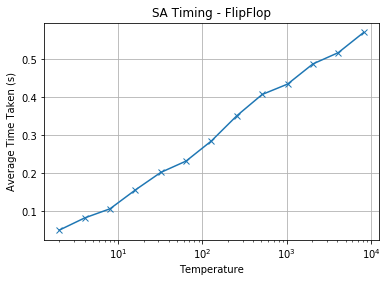

In [38]:
# Timing plotfig, ax = plt.subplots()
fig, ax = plt.subplots()
ax.set_xlabel("Temperature")
ax.set_ylabel("Average Time Taken (s)")
ax.set_xscale('log')
title = "SA Timing - " + problem
plt.title(title)
plt.grid()
plt.plot(temperatures, timing_data, 'x-')

# Genetic Algorithm

In [42]:
dataFile = 'outputs/FlipFlop_GA/ga__FlipFlop_GA__run_stats_df.csv'

df = pd.read_csv(dataFile)
populations = df['Population Size'].unique()
mutations   = df['Mutation Rate'].unique()
print(populations, mutations)

[ 50 100 150 200] [0.2 0.3 0.4 0.5]


In [121]:
fitness_data = []
best_fitness = []
timing_data  = []

for p in populations:
    tmpTimes = []
    tmpBestFit = []
    for m in mutations:
        tmp = df.loc[(df['Population Size'] == p)].copy()
        tmp = tmp.loc[(tmp['Mutation Rate'] == m)].copy()
        fit = tmp[['Iteration', 'Fitness']].copy()
        bestFit = fit[['Fitness']].max()[0]
        fit.rename(columns={'Fitness': 'Population ' + str(p) + ' Mutation ' + str(m)}, inplace=True)
        
        tmpBestFit.append(bestFit)
        fitness_data.append(fit)
        
        
        time = tmp[['Time']].mean()
        tmpTimes.append(time[0])
    timing_data.append(tmpTimes)
    best_fitness.append(tmpBestFit)

fitness = reduce(lambda left, right: pd.merge(left, right, on=['Iteration'], how='outer'), fitness_data)

fitness.head()
#print(timing_data)
print(best_fitness)

[[19.0, 18.0, 19.0, 19.0], [19.0, 18.0, 18.0, 18.0], [19.0, 19.0, 19.0, 19.0], [19.0, 19.0, 19.0, 19.0]]


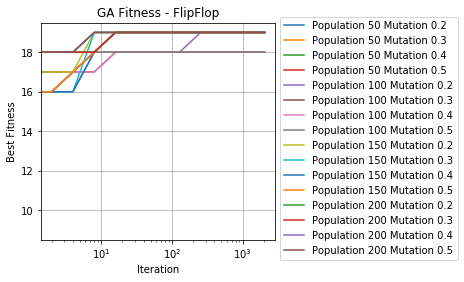

In [167]:
# Fitness plot 1
ax = fitness.plot(x='Iteration')
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width*0.7, pos.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.4, 1.05), ncol=1)
ax.set_xlabel("Iteration")
ax.set_ylabel("Best Fitness")
ax.set_xscale('log')
title = "GA Fitness - " + problem
plt.title(title)
plt.grid()

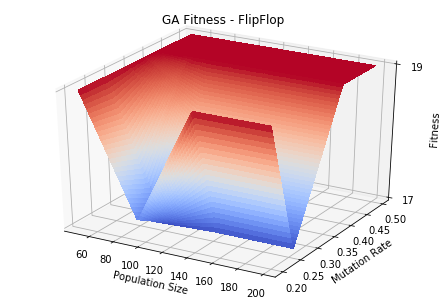

In [188]:
# Fitness plot 2
x, y = np.meshgrid(populations, mutations)
z = np.array(best_fitness)

fig = plt.figure()
ax = Axes3D(fig)
f = interp2d(x, y, z, kind='linear')
x_new = np.arange(min(populations), max(populations), (max(populations)-min(populations))/100)
y_new = np.arange(min(mutations), max(mutations), (max(mutations)-min(mutations))/100)
z_new = f(x_new, y_new)
Xn, Yn = np.meshgrid(x_new, y_new)

surf = ax.plot_surface(Xn, Yn, z_new, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=False)

ax.set_xlabel('Population Size')
ax.set_ylabel('Mutation Rate')
ax.set_zlabel('Fitness')
ax.zaxis.set_major_locator(LinearLocator(len(np.unique(best_fitness))))
ax.zaxis.set_major_formatter(FormatStrFormatter('%d'))

title = "GA Fitness - " + problem
plt.title(title)
plt.show()

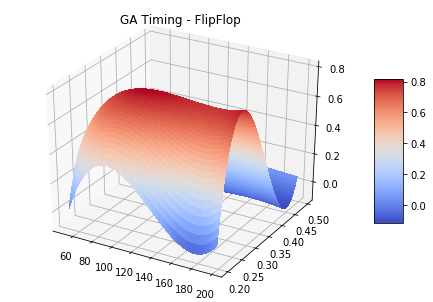

In [182]:
# Timing plot

from scipy.interpolate import interp2d

x, y = np.meshgrid(populations, mutations)
z = np.array(timing_data)
fig = plt.figure()
ax = Axes3D(fig)

# interpolate data for a finer grid
f = interp2d(x, y, z, kind='cubic')
x_new = np.arange(min(populations), max(populations), (max(populations)-min(populations))/100)
y_new = np.arange(min(mutations), max(mutations), (max(mutations)-min(mutations))/100)
z_new = f(x_new, y_new)
Xn, Yn = np.meshgrid(x_new, y_new)

surf = ax.plot_surface(Xn, Yn, z_new, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
title = "GA Timing - " + problem
plt.title(title)
plt.show()

# MIMIC

In [205]:
dataFile = 'outputs/TravelingSalesman_MIMIC/mimic__TravelingSalesman_MIMIC__run_stats_df.csv'

df = pd.read_csv(dataFile)
populations = df['Population Size'].unique()
keep_pct    = df['Keep Percent'].unique()
print(populations, keep_pct)

[ 50 100 150 200] [0.01 0.02 0.04 0.08 0.16 0.32]


In [206]:
fitness_data = []
best_fitness = []
timing_data  = []

for p in populations:
    tmpTimes = []
    tmpBestFit = []
    for k in keep_pct:
        tmp = df.loc[(df['Population Size'] == p)].copy()
        tmp = tmp.loc[(tmp['Keep Percent'] == k)].copy()
        fit = tmp[['Iteration', 'Fitness']].copy()
        bestFit = fit[['Fitness']].max()[0]
        fit.rename(columns={'Fitness': 'Population ' + str(p) + ' Keep Percent ' + str(m)}, inplace=True)
        
        tmpBestFit.append(bestFit)
        fitness_data.append(fit)
        
        
        time = tmp[['Time']].mean()
        tmpTimes.append(time[0])
    timing_data.append(tmpTimes)
    best_fitness.append(tmpBestFit)

fitness = reduce(lambda left, right: pd.merge(left, right, on=['Iteration'], how='outer'), fitness_data)

fitness.head()
#print(timing_data)
print(best_fitness)

[[3122.834047054343, 3122.834047054343, 3122.834047054343, 3122.834047054343, 3122.834047054343, 3122.834047054343], [3122.834047054343, 3122.834047054343, 3122.834047054343, 3122.834047054343, 3122.834047054343, 3122.834047054343], [3122.834047054343, 3122.834047054343, 3122.834047054343, 3122.834047054343, 3122.834047054343, 3122.834047054343], [3122.834047054343, 3122.834047054343, 3122.834047054343, 3122.834047054343, 3122.834047054343, 3122.834047054343]]


Text(0.5, 0.92, 'MIMIC Fitness - FlipFlop')

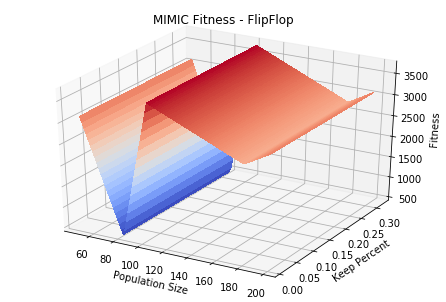

In [209]:
# Fitness plot 
x, y = np.meshgrid(populations, keep_pct)
z = np.array(best_fitness)

fig = plt.figure()
ax = Axes3D(fig)
f = interp2d(x, y, z, kind='linear')
x_new = np.arange(min(populations), max(populations), (max(populations)-min(populations))/100)
y_new = np.arange(min(keep_pct), max(keep_pct), (max(keep_pct)-min(keep_pct))/100)
z_new = f(x_new, y_new)
Xn, Yn = np.meshgrid(x_new, y_new)

surf = ax.plot_surface(Xn, Yn, z_new, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=False)

ax.set_xlabel('Population Size')
ax.set_ylabel('Keep Percent')
ax.set_zlabel('Fitness')
ax.zaxis.set_major_formatter(FormatStrFormatter('%d'))

title = "MIMIC Fitness - " + problem
plt.title(title)

/home/reed/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,7 m=24 fp=31.382498 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


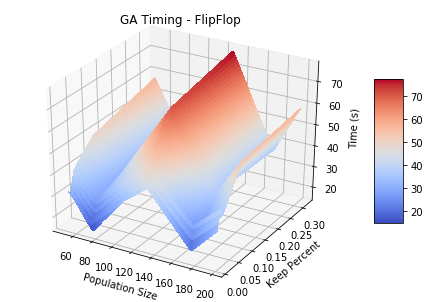

In [208]:
# Timing plot
x, y = np.meshgrid(populations, keep_pct)
z = np.array(timing_data)
fig = plt.figure()
ax = Axes3D(fig)

# interpolate data for a finer grid
f = interp2d(x, y, z, kind='linear')
x_new = np.arange(min(populations), max(populations), (max(populations)-min(populations))/100)
y_new = np.arange(min(keep_pct), max(keep_pct), (max(keep_pct)-min(keep_pct))/100)
z_new = f(x_new, y_new)
Xn, Yn = np.meshgrid(x_new, y_new)
surf = ax.plot_surface(Xn, Yn, z_new, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=False)
ax.set_xlabel('Population Size')
ax.set_ylabel('Keep Percent')
ax.set_zlabel('Time (s)')
fig.colorbar(surf, shrink=0.5, aspect=5)
title = "GA Timing - " + problem
plt.title(title)
plt.show()

In [237]:
best_fitness = np.array(best_fitness)
timing_data = np.array(timing_data)
print(best_fitness, '\n')

best_score = np.amax(best_fitness)
print(best_score, '\n')

indices = np.where(best_fitness == 19)
best_time = timing_data[np.where(best_fitness == best_score)].min()
print(best_time)

[19. 19. 19. 18. 19. 19. 18. 19. 19. 19. 19. 19. 19.] 

19.0 

0.0508737770830218
